In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Muat dataset yang sudah diunggah
file_path = '/content/drive/MyDrive/Machine Learning/Pertemuan_5_dataset/fire_archive_M-C61_666739.csv' # Pastikan nama file sesuai
df = pd.read_csv(file_path)
print(f"Jumlah data titik panas awal: {len(df)}")

# --- Langkah 2: Pembersihan Data (BARU) ---
# Menangani nilai yang hilang di kolom kunci
df.dropna(subset=['latitude', 'longitude'], inplace=True)
print(f"Jumlah data setelah membuang nilai kosong: {len(df)}")

# Menghapus data duplikat berdasarkan lokasi dan waktu
df.drop_duplicates(subset=['latitude', 'longitude', 'acq_date', 'acq_time'], inplace=True)
print(f"Jumlah data setelah membuang duplikat: {len(df)}")


# --- Langkah 3: Filter Data Sesuai Artikel ---
df_filtered = df[df['confidence'] > 80].copy()
print(f"Jumlah data setelah difilter (confidence > 80%): {len(df_filtered)}")
X = df_filtered[['longitude', 'latitude']].values


# --- Langkah 4: Standarisasi Data (BARU) ---
# Menggunakan metode Z-score (StandardScaler)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("\nData telah berhasil distandarisasi.")


Jumlah data titik panas awal: 53128
Jumlah data setelah membuang nilai kosong: 53128
Jumlah data setelah membuang duplikat: 53128
Jumlah data setelah difilter (confidence > 80%): 11526

Data telah berhasil distandarisasi.


In [ ]:
from sklearn.cluster import DBSCAN

# Inisialisasi model DBSCAN dengan parameter dari artikel
dbscan = DBSCAN(eps=0.5, min_samples=15)

# Terapkan model ke data koordinat (X)
clusters = dbscan.fit_predict(X)

# Tambahkan hasil label klaster ke dataframe kita untuk analisis lebih lanjut
df_filtered['cluster'] = clusters

In [ ]:
# Dapatkan label unik. Label -1 adalah noise/outlier.
labels = dbscan.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("\n--- Hasil Clustering DBSCAN ---")
print(f"Estimasi jumlah klaster: {n_clusters_}")
print(f"Estimasi jumlah titik noise: {n_noise_}")

# Tampilkan rincian jumlah titik per klaster
print("\nJumlah titik per klaster:")
print(df_filtered['cluster'].value_counts())


--- Hasil Clustering DBSCAN ---
Estimasi jumlah klaster: 25
Estimasi jumlah titik noise: 319

Jumlah titik per klaster:
cluster
 3     5210
 4     2495
 18     939
 0      535
 2      502
-1      319
 20     266
 15     151
 10     142
 12     137
 14     137
 19     134
 8      122
 13      68
 17      61
 5       55
 16      49
 11      30
 1       27
 22      27
 9       24
 6       24
 21      22
 7       17
 24      17
 23      16
Name: count, dtype: int64


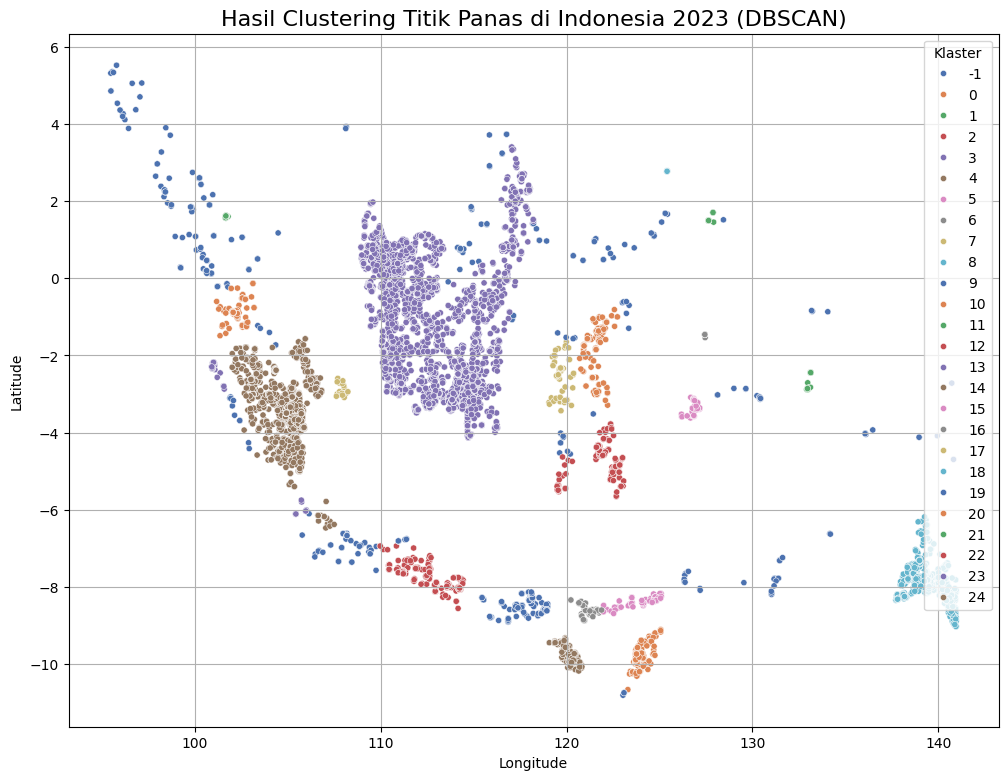

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 9))

# Gunakan seaborn untuk membuat scatter plot yang informatif
sns.scatterplot(
    x='longitude',
    y='latitude',
    data=df_filtered,
    hue='cluster',      # Warnai titik berdasarkan kolom 'cluster'
    palette='deep',     # Pilih skema warna
    s=20,               # Atur ukuran titik
    legend='full'
)

plt.title('Hasil Clustering Titik Panas di Indonesia 2023 (DBSCAN)', fontsize=16)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.legend(title='Klaster', loc='upper right')
plt.show()

/tmp/ipython-input-3039035966.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


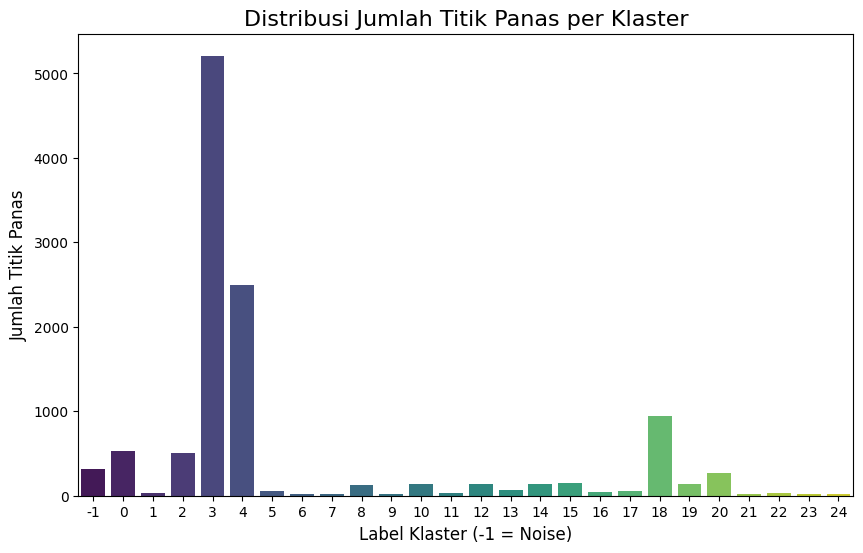

In [ ]:
plt.figure(figsize=(10, 6))
cluster_counts = df_filtered['cluster'].value_counts()

# Mengurutkan berdasarkan label klaster (-1, 0, 1, 2, ...) untuk keterbacaan
cluster_counts = cluster_counts.sort_index()

sns.barplot(
    x=cluster_counts.index,
    y=cluster_counts.values,
    palette='viridis'
)

plt.title('Distribusi Jumlah Titik Panas per Klaster', fontsize=16)
plt.xlabel('Label Klaster (-1 = Noise)', fontsize=12)
plt.ylabel('Jumlah Titik Panas', fontsize=12)
plt.show()